Linear Regression RMSE: 24.36
Support Vector Regression RMSE: 40.04
Simple Neural Network RMSE: 24.37
Random Forest RMSE: 26.22
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 2506, number of used features: 9
[LightGBM] [Info] Start training from score 81.669673
LightGBM RMSE: 25.87
KNN RMSE: 29.95


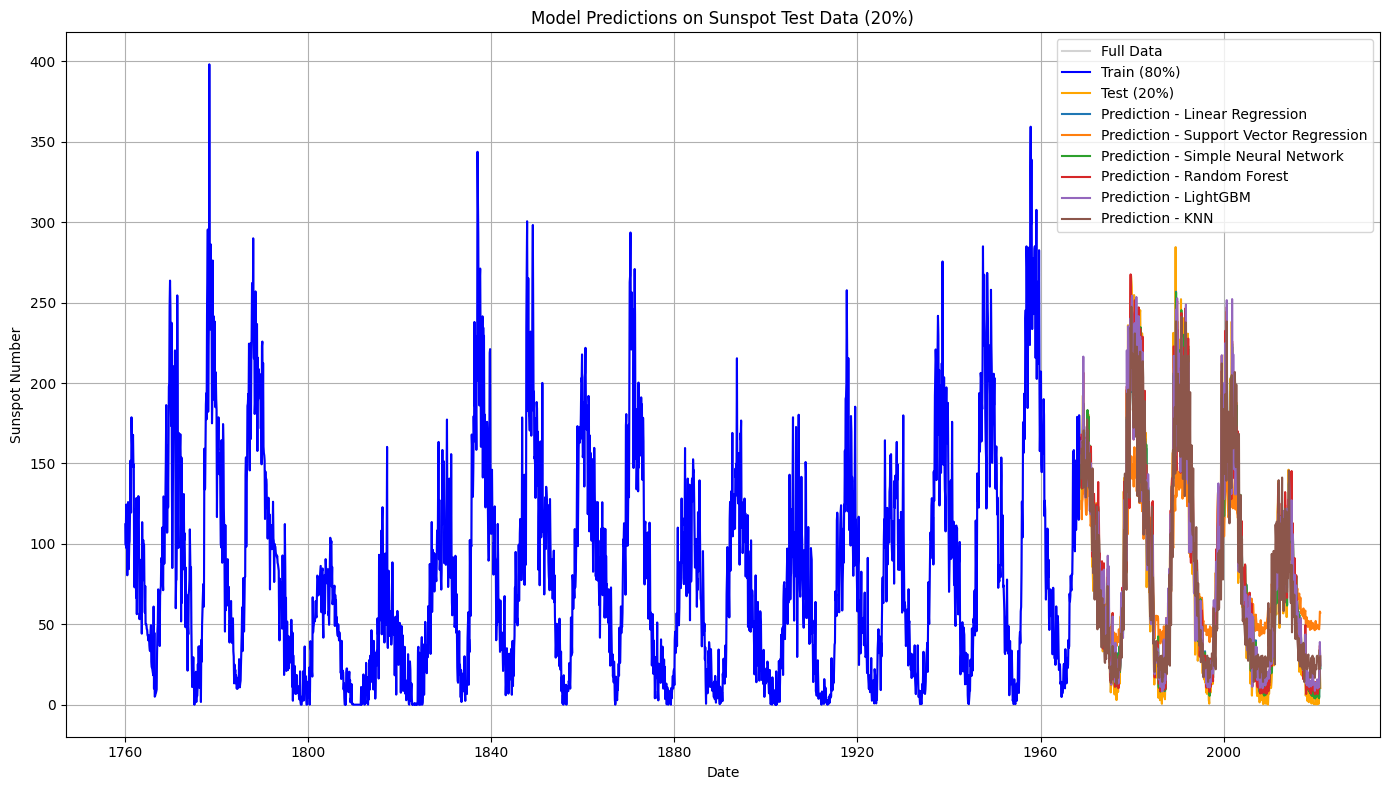

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
df = pd.read_csv("Sunspots.csv")  # You already specified this step stays

# Prepare date and features
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop NaN values
df = df.dropna().reset_index(drop=True)

features = [
    'Month_sin', 'Month_cos', 'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132',
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Split 80% train, 20% test (no shuffle)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Simple Neural Network': MLPRegressor(max_iter=1000, random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'LightGBM': LGBMRegressor(random_state=0),
    'KNN': KNeighborsRegressor()
}

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], y, color='lightgray', label='Full Data')
plt.plot(date_train, y_train, label='Train (80%)', color='blue')
plt.plot(date_test, y_test, label='Test (20%)', color='orange')

# Apply each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plt.plot(date_test, y_pred, label=f'Prediction - {name}')

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")

plt.title("Model Predictions on Sunspot Test Data (20%)")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression - Train RMSE: 27.01, Test RMSE: 24.36
Support Vector Regression - Train RMSE: 36.76, Test RMSE: 40.04
Simple Neural Network - Train RMSE: 26.95, Test RMSE: 24.38
Random Forest - Train RMSE: 10.29, Test RMSE: 26.22


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'early_stopping_rounds'

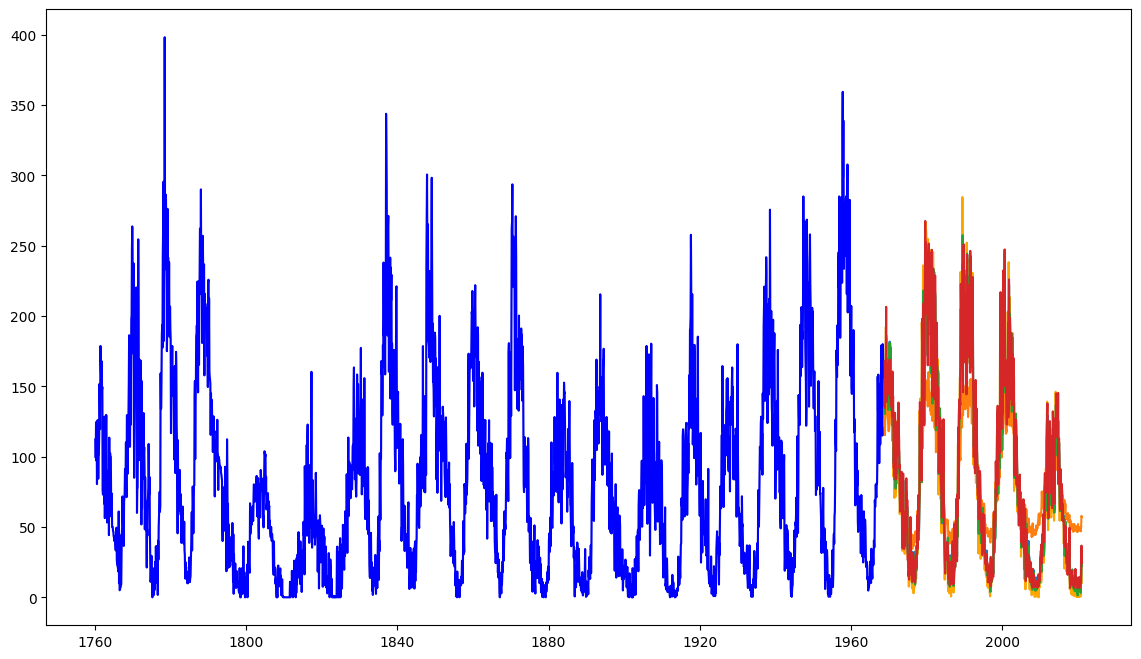

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Veri yükle
df = pd.read_csv("Sunspots.csv")

# Tarih ve özellikler hazırlanıyor
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df = df.dropna().reset_index(drop=True)

features = [
    'Month_sin', 'Month_cos', 'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132',
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Train-test split (zaman sırasına göre, shuffle=False)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize et
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeller
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Simple Neural Network': MLPRegressor(
        max_iter=1000,
        random_state=0,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20
    ),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'LightGBM': LGBMRegressor(
        random_state=0,
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1
    ),
    'KNN': KNeighborsRegressor()
}

plt.figure(figsize=(14, 8))
plt.plot(df['Date'], y, color='lightgray', label='Full Data')
plt.plot(date_train, y_train, label='Train (80%)', color='blue')
plt.plot(date_test, y_test, label='Test (20%)', color='orange')

for name, model in models.items():
    if name == 'LightGBM':
        model.fit(
            X_train_scaled, y_train,
            eval_set=[(X_test_scaled, y_test)],
            early_stopping_rounds=50,
            verbose=False
        )
        y_train_pred = model.predict(X_train_scaled, num_iteration=model.best_iteration_)
        y_test_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration_)
    else:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"{name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

    plt.plot(date_test, y_test_pred, label=f'Prediction - {name}')

plt.title("Model Predictions on Sunspot Test Data (20%)")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression - Train RMSE: 27.01, Test RMSE: 24.36
Support Vector Regression - Train RMSE: 36.76, Test RMSE: 40.04
Simple Neural Network - Train RMSE: 26.95, Test RMSE: 24.38
Random Forest - Train RMSE: 10.29, Test RMSE: 26.22
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 2506, number of used features: 9
[LightGBM] [Info] Start training from score 81.669673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

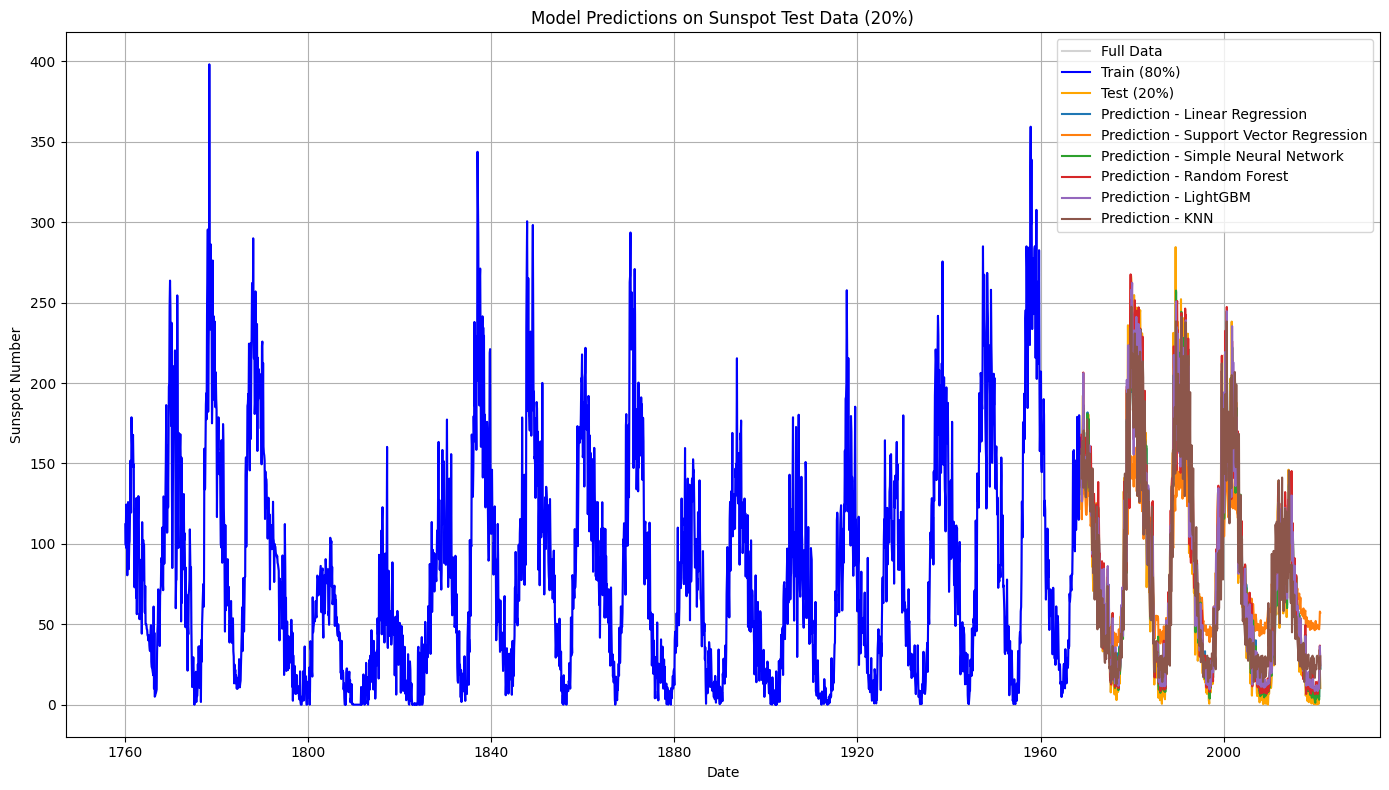

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Veri yükle
df = pd.read_csv("Sunspots.csv")

# Tarih ve özellikler hazırlanıyor
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df = df.dropna().reset_index(drop=True)

features = [
    'Month_sin', 'Month_cos', 'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132',
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Train-test split (zaman sırasına göre, shuffle=False)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize et
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeller
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Simple Neural Network': MLPRegressor(
        max_iter=1000,
        random_state=0,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=20
    ),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'LightGBM': LGBMRegressor(
        random_state=0,
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1
    ),
    'KNN': KNeighborsRegressor()
}

plt.figure(figsize=(14, 8))
plt.plot(df['Date'], y, color='lightgray', label='Full Data')
plt.plot(date_train, y_train, label='Train (80%)', color='blue')
plt.plot(date_test, y_test, label='Test (20%)', color='orange')

for name, model in models.items():
    if name == 'LightGBM':
        model.fit(
            X_train_scaled, y_train,
            eval_set=[(X_test_scaled, y_test)],
            callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
        )
        y_train_pred = model.predict(X_train_scaled, num_iteration=model.best_iteration_)
        y_test_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration_)
    else:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"{name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

    plt.plot(date_test, y_test_pred, label=f'Prediction - {name}')

plt.title("Model Predictions on Sunspot Test Data (20%)")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


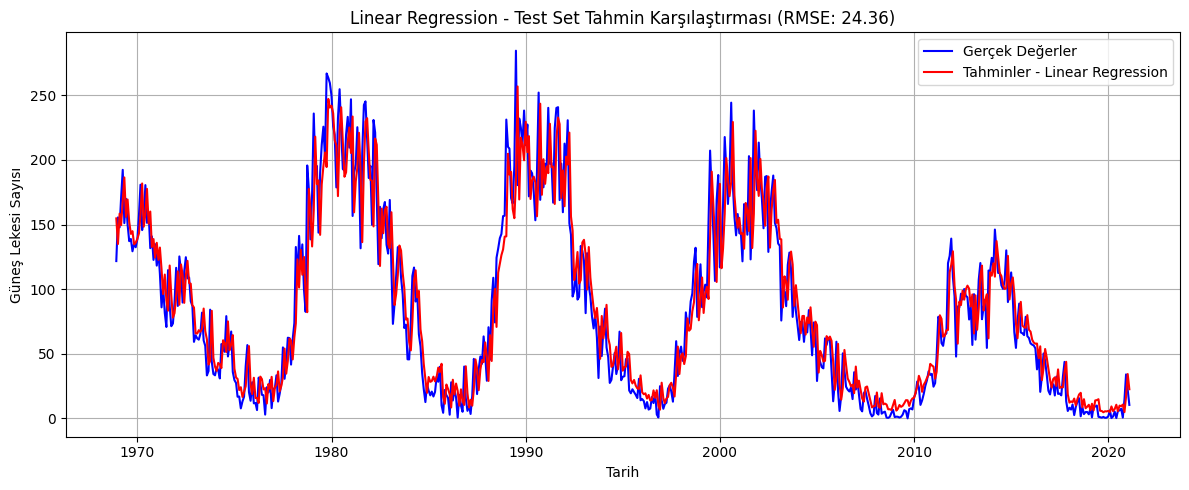

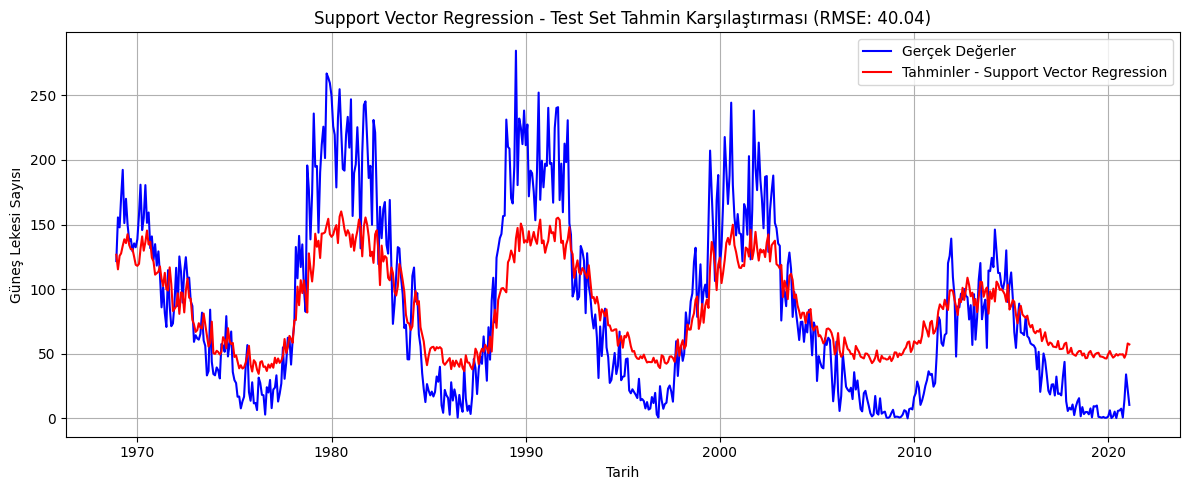

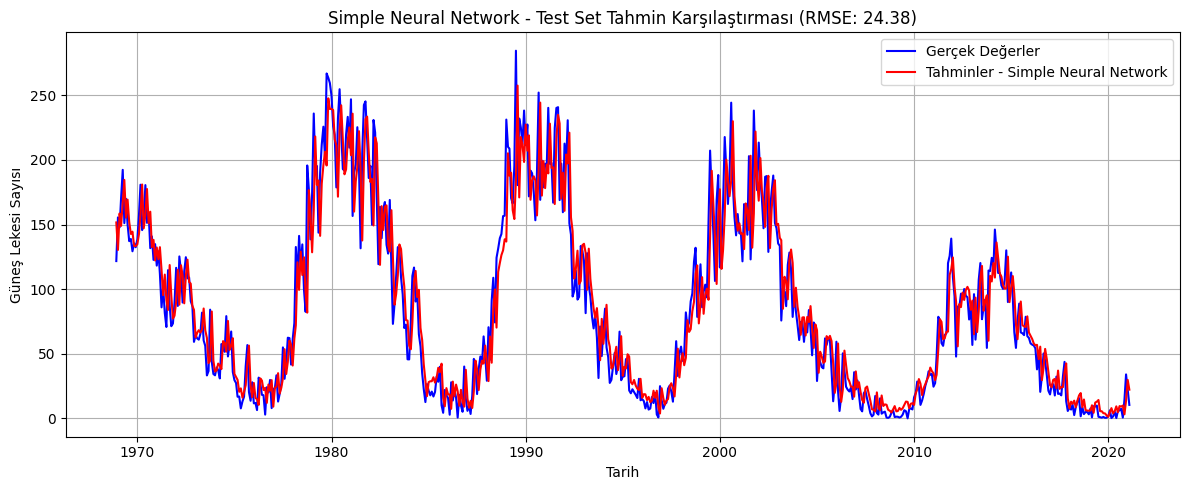

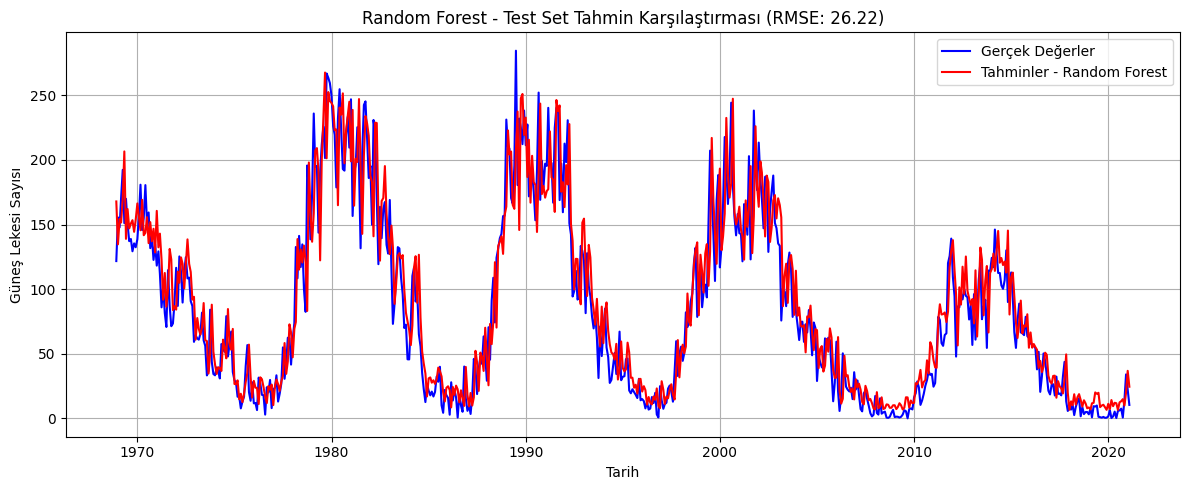

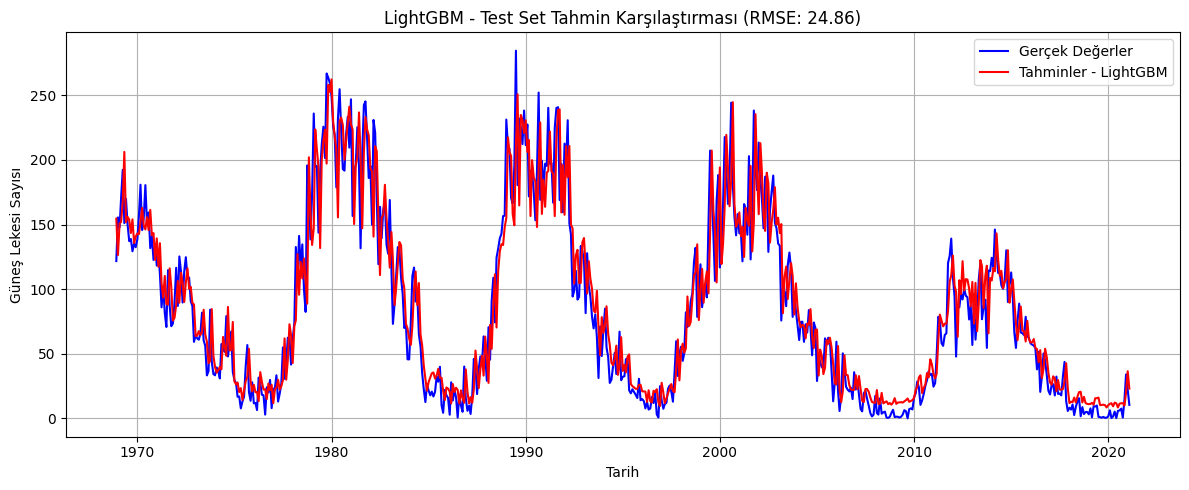

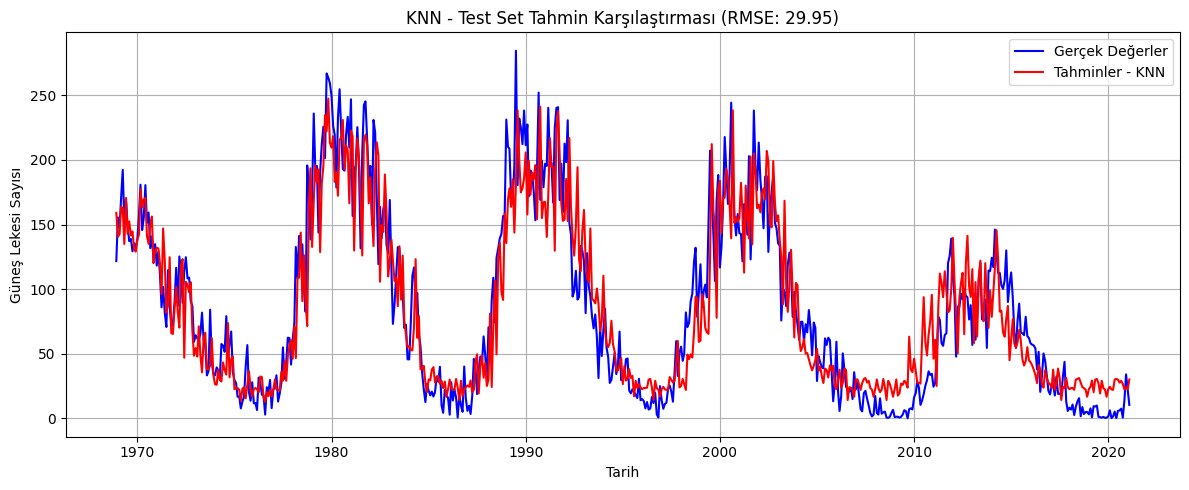

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

for name, model in models.items():
    if name == 'LightGBM':
        y_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration_)
    else:
        y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    plt.figure(figsize=(12, 5))
    plt.plot(date_test, y_test, label='Gerçek Değerler', color='blue')
    plt.plot(date_test, y_pred, label=f'Tahminler - {name}', color='red')
    plt.title(f"{name} - Test Set Tahmin Karşılaştırması (RMSE: {rmse:.2f})")
    plt.xlabel("Tarih")
    plt.ylabel("Güneş Lekesi Sayısı")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


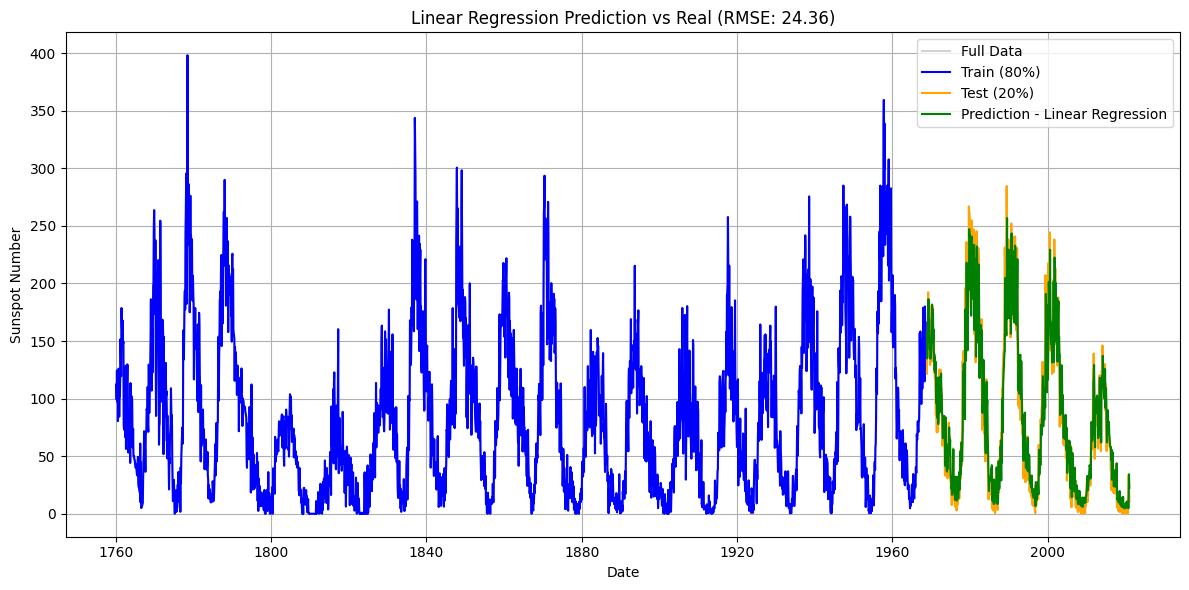

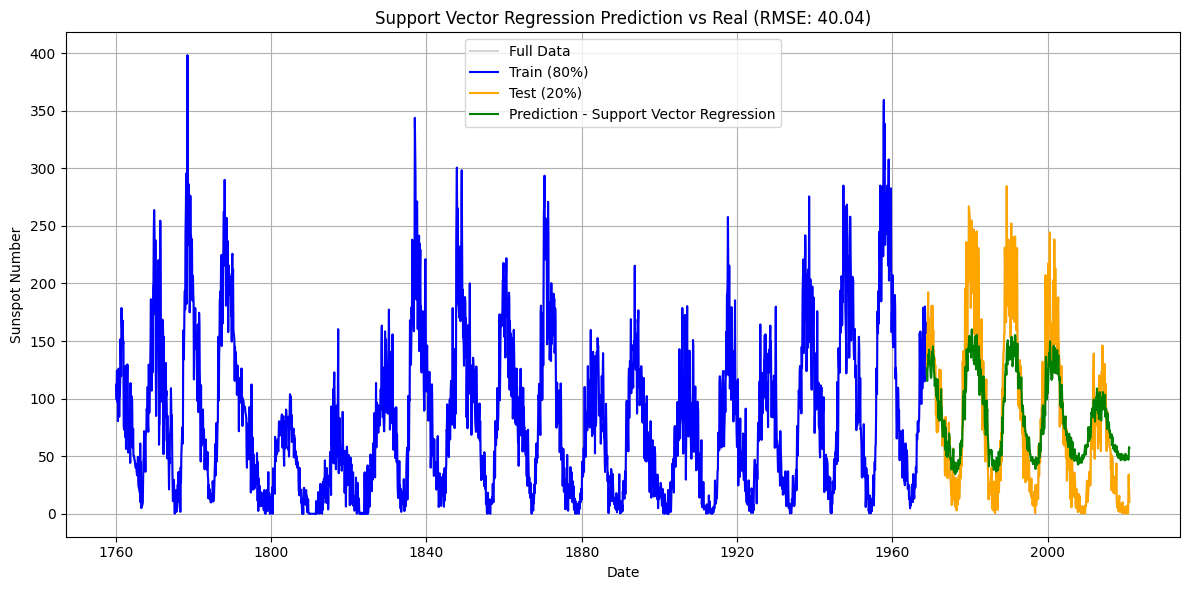

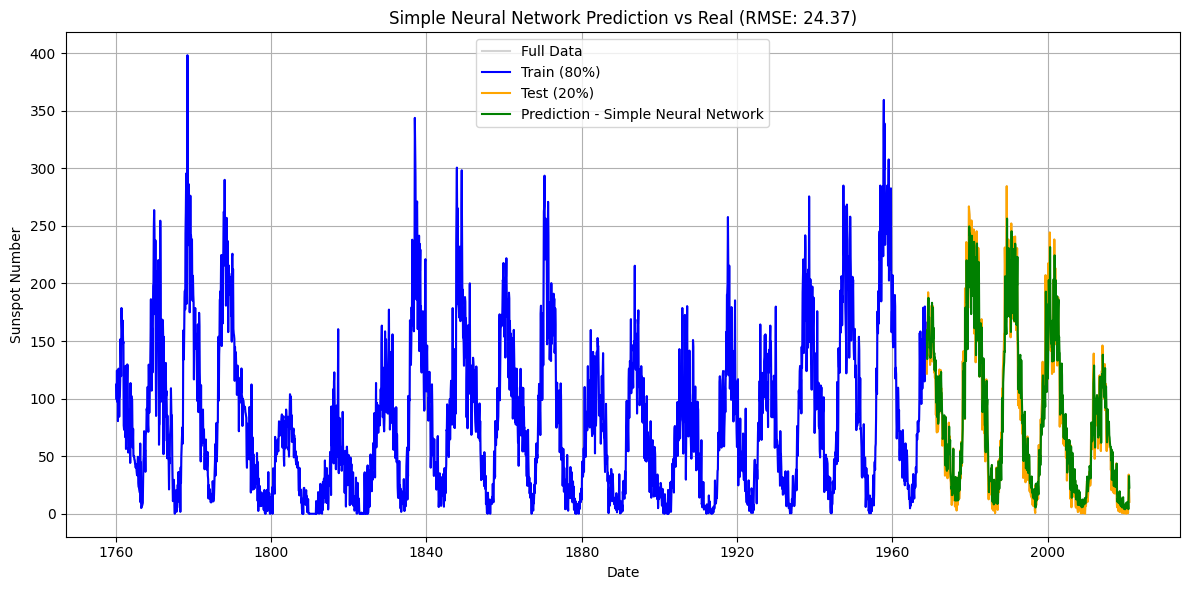

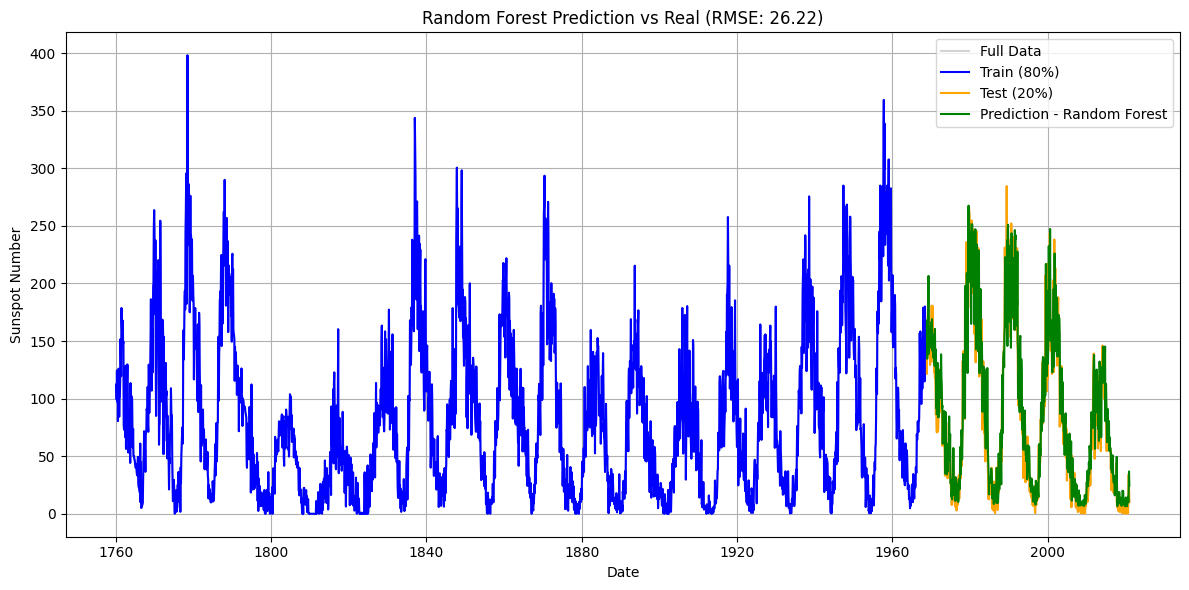

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 2506, number of used features: 9
[LightGBM] [Info] Start training from score 81.669673


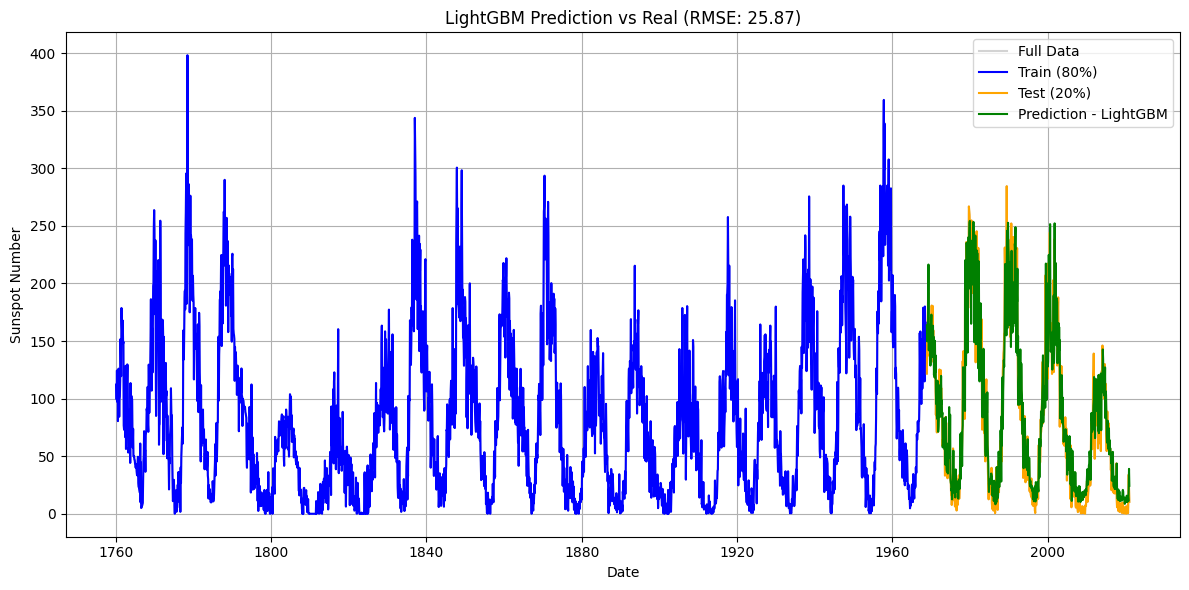

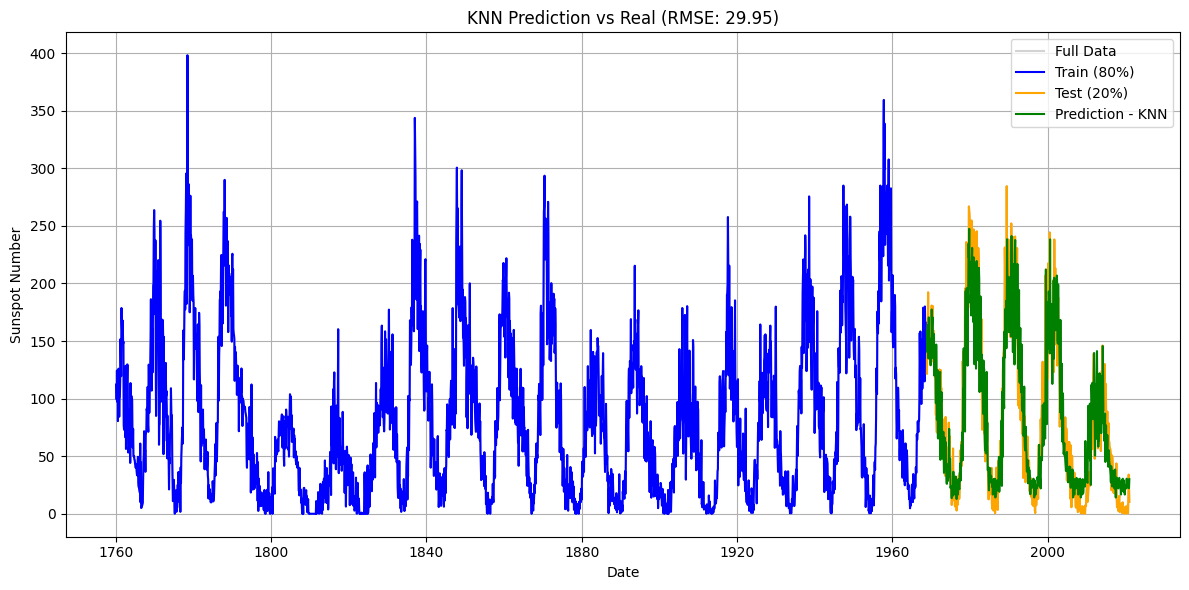


Model Performance (sorted by RMSE):
                    Model      RMSE
        Linear Regression 24.359730
    Simple Neural Network 24.371446
                 LightGBM 25.873009
            Random Forest 26.220025
                      KNN 29.948835
Support Vector Regression 40.036845


In [13]:
# Sunspot Forecasting with Multiple Models (Train/Test = 80%/20%)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
df = pd.read_csv("Sunspots.csv")  # You already specified this step stays

# Prepare date and features
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop NaN values
df = df.dropna().reset_index(drop=True)

features = [
    'Month_sin', 'Month_cos', 'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag132',
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Split 80% train, 20% test (no shuffle)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Simple Neural Network': MLPRegressor(max_iter=1000, random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'LightGBM': LGBMRegressor(random_state=0),
    'KNN': KNeighborsRegressor()
}

results = []

# Apply each model and plot separately
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'RMSE': rmse})

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], y, color='lightgray', label='Full Data')
    plt.plot(date_train, y_train, label='Train (80%)', color='blue')
    plt.plot(date_test, y_test, label='Test (20%)', color='orange')
    plt.plot(date_test, y_pred, label=f'Prediction - {name}', color='green')

    plt.title(f"{name} Prediction vs Real (RMSE: {rmse:.2f})")
    plt.xlabel("Date")
    plt.ylabel("Sunspot Number")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Show results as table
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df.to_string(index=False))


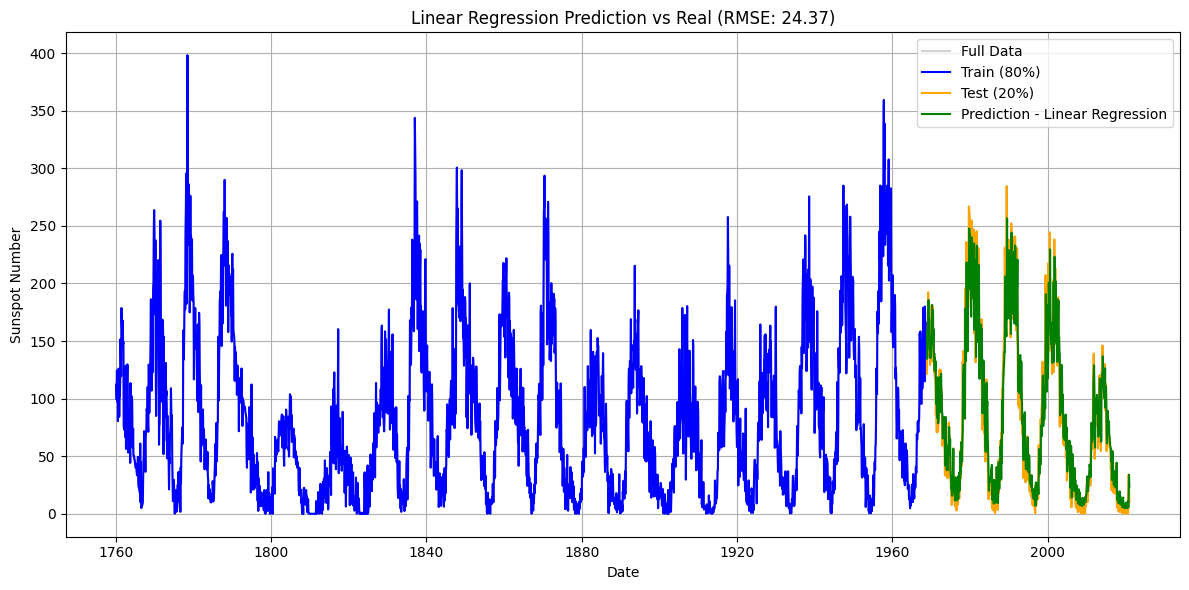

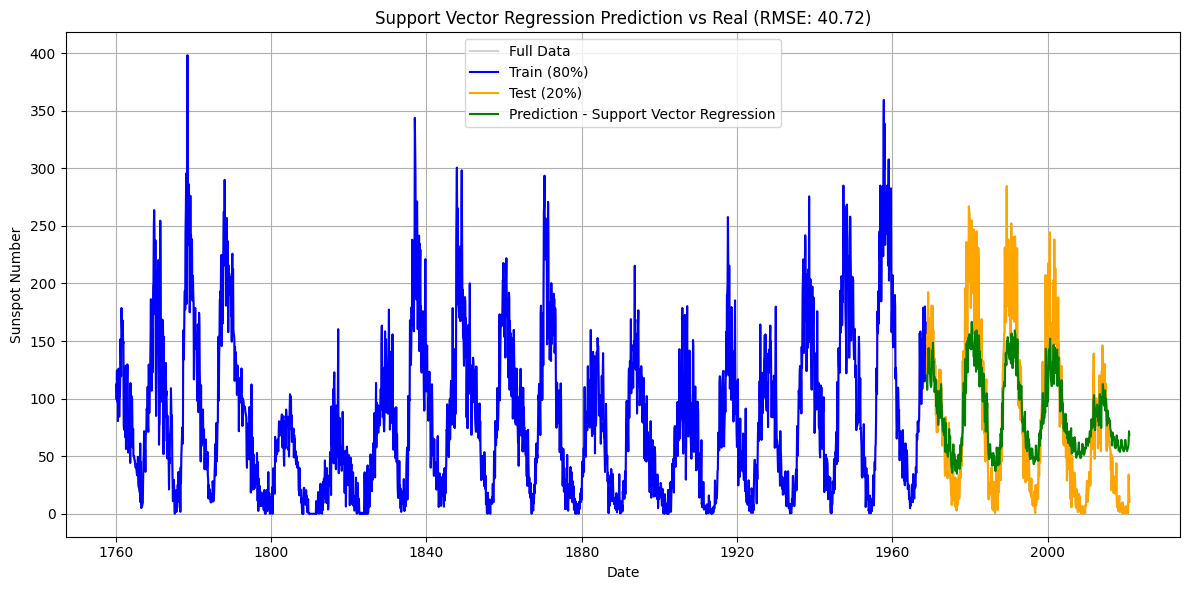

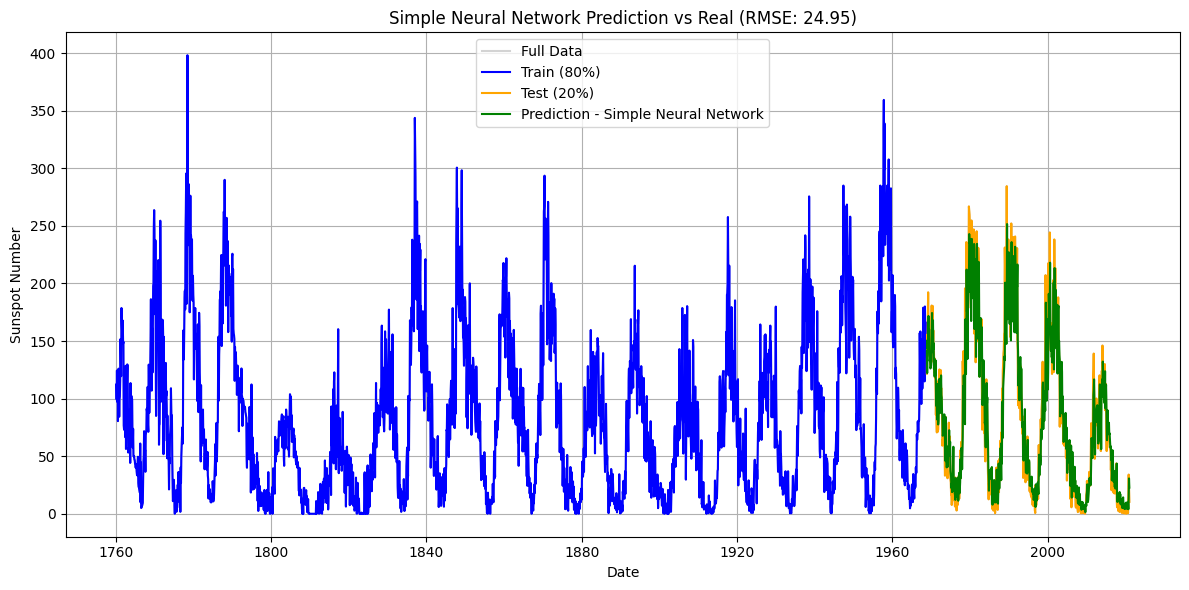

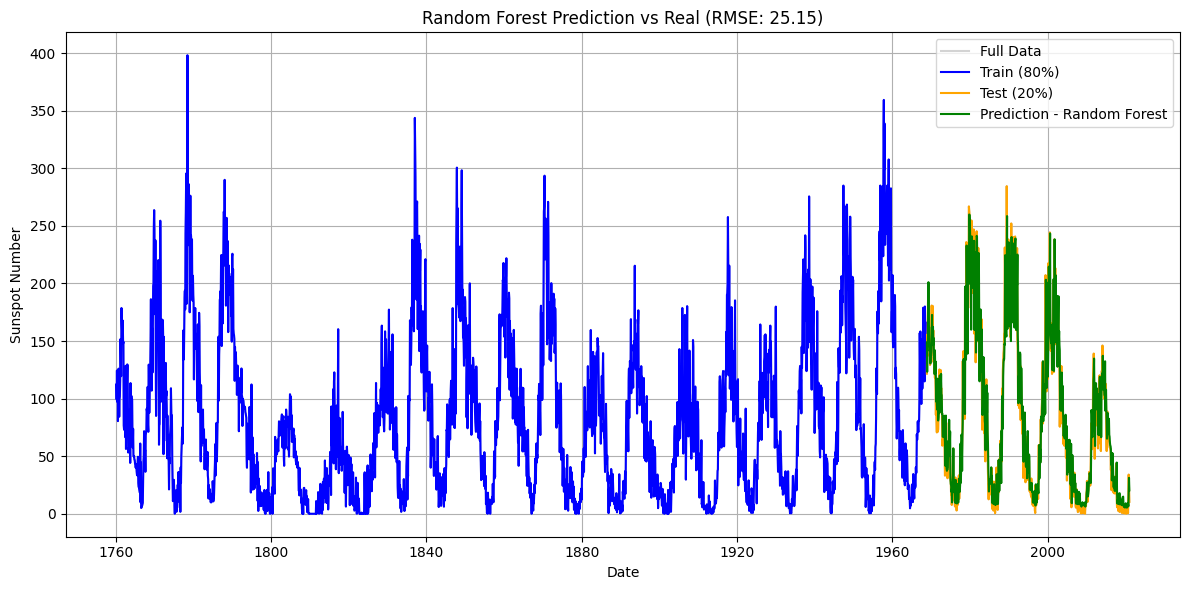

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 2506, number of used features: 6
[LightGBM] [Info] Start training from score 81.669673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

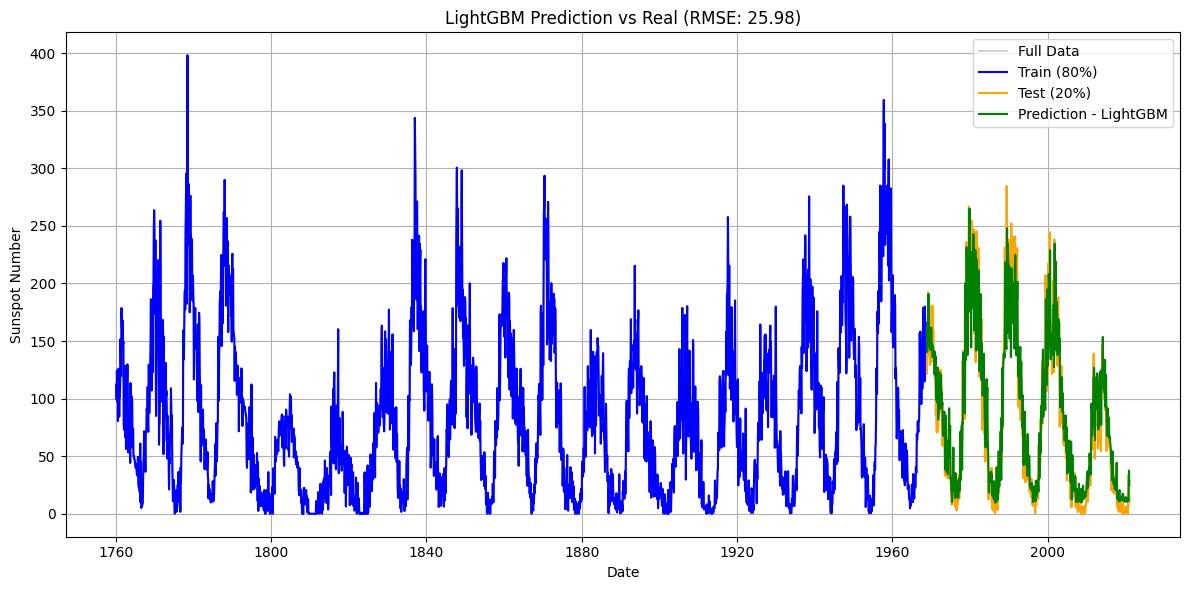

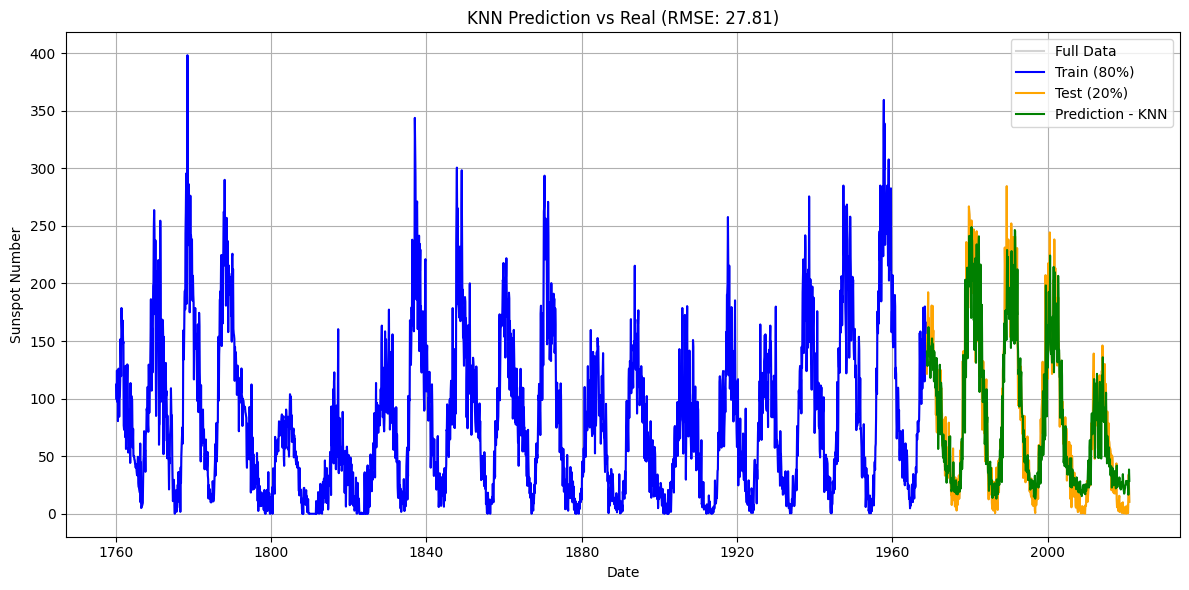


Model Performance (sorted by RMSE):
                    Model      RMSE
        Linear Regression 24.374635
    Simple Neural Network 24.952241
            Random Forest 25.145687
                 LightGBM 25.978737
                      KNN 27.806678
Support Vector Regression 40.717300


In [14]:
# Sunspot Forecasting with Multiple Models (Train/Test = 80%/20%)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
df = pd.read_csv("Sunspots.csv")  # You already specified this step stays

# Prepare date and features
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(12)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop NaN values
df = df.dropna().reset_index(drop=True)

features = [
     'Year', 'Month',
    'Sunspot_lag1', 'Sunspot_lag12', 
    'Diff_11Year', 'Diff_1Year'
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Split 80% train, 20% test (no shuffle)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    'Simple Neural Network': MLPRegressor(
        hidden_layer_sizes=(50,), alpha=0.01, max_iter=1000,
        early_stopping=True, random_state=0
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=0
    ),
    'LightGBM': LGBMRegressor(
        random_state=0, num_leaves=15, min_child_samples=10, max_depth=5
    ),
    'KNN': KNeighborsRegressor(n_neighbors=10)
}

results = []

# Apply each model and plot separately
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'RMSE': rmse})

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], y, color='lightgray', label='Full Data')
    plt.plot(date_train, y_train, label='Train (80%)', color='blue')
    plt.plot(date_test, y_test, label='Test (20%)', color='orange')
    plt.plot(date_test, y_pred, label=f'Prediction - {name}', color='green')

    plt.title(f"{name} Prediction vs Real (RMSE: {rmse:.2f})")
    plt.xlabel("Date")
    plt.ylabel("Sunspot Number")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Show results as table
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df.to_string(index=False))


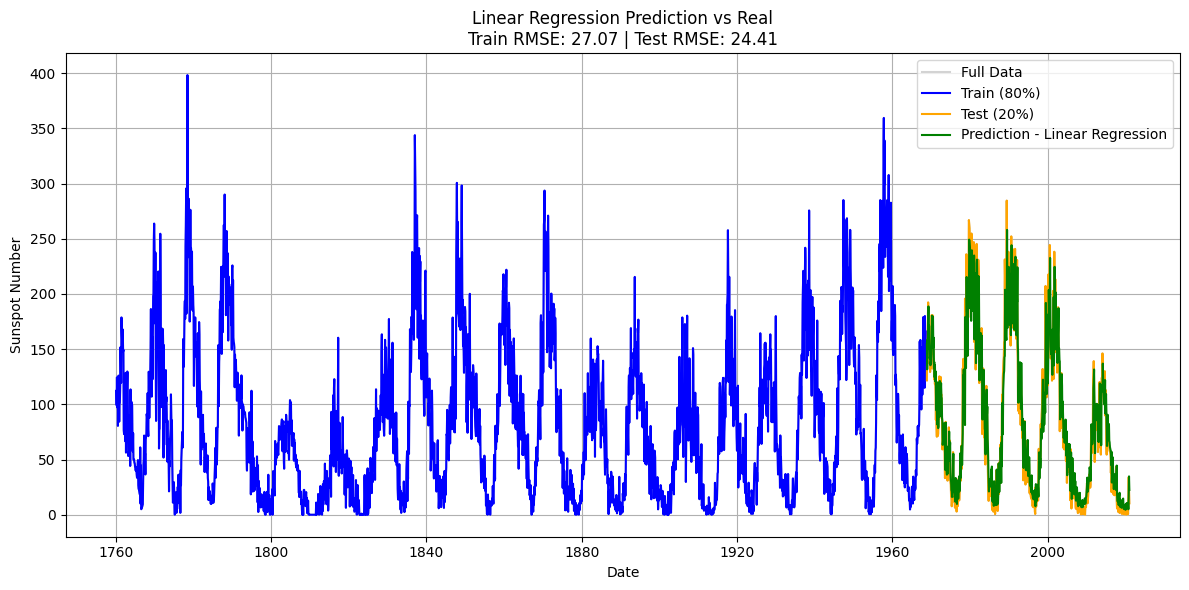

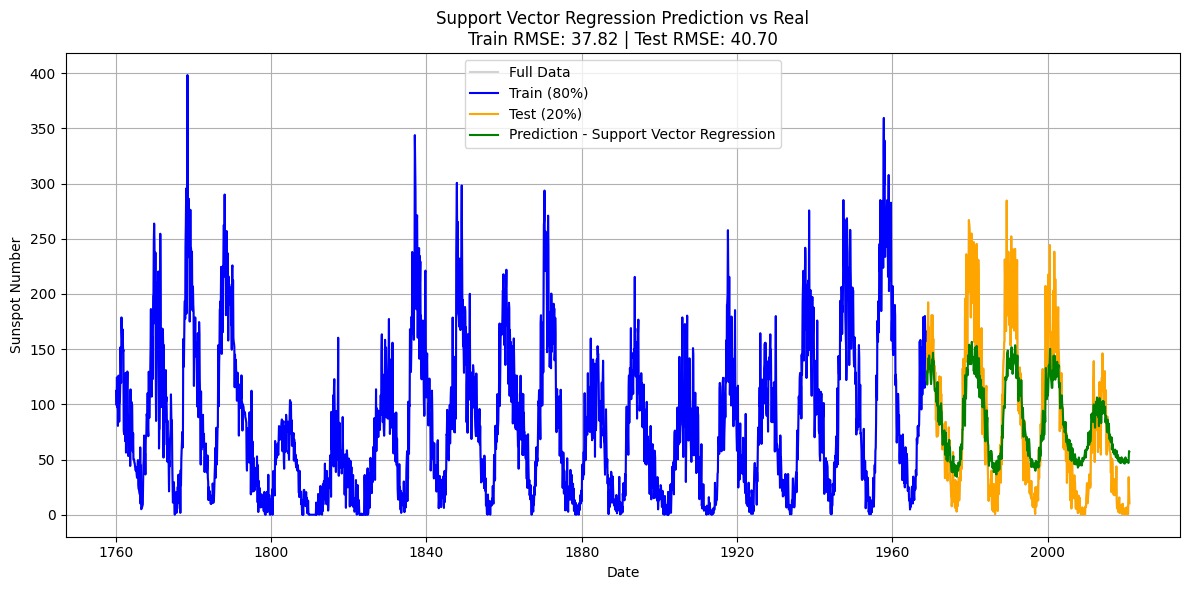

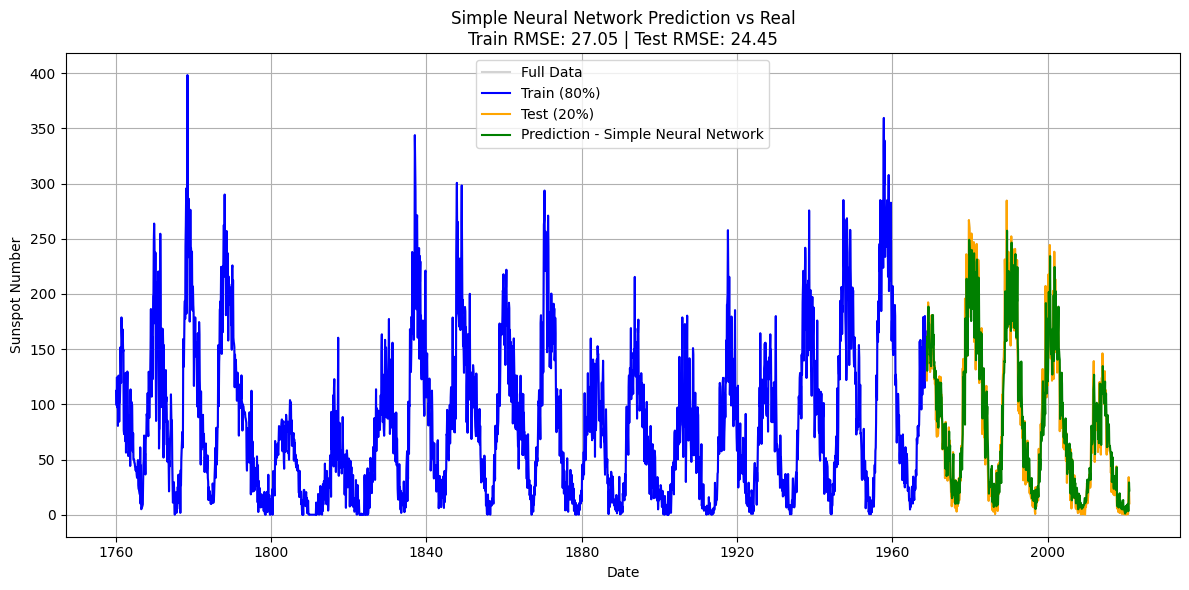

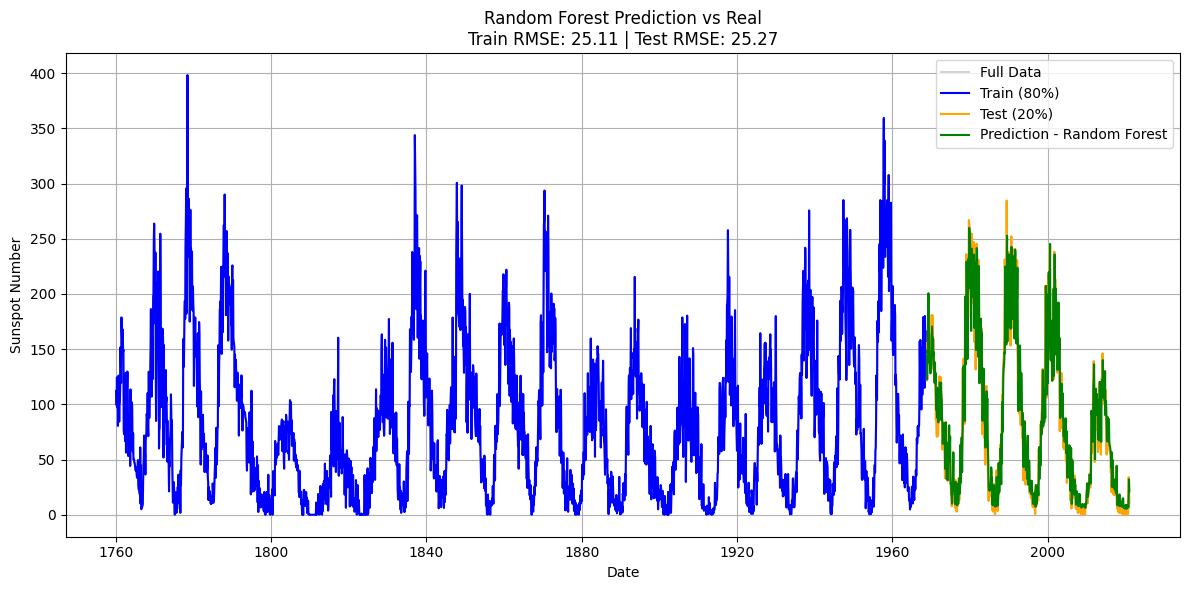

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1262
[LightGBM] [Info] Number of data points in the train set: 2506, number of used features: 8
[LightGBM] [Info] Start training from score 81.669673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


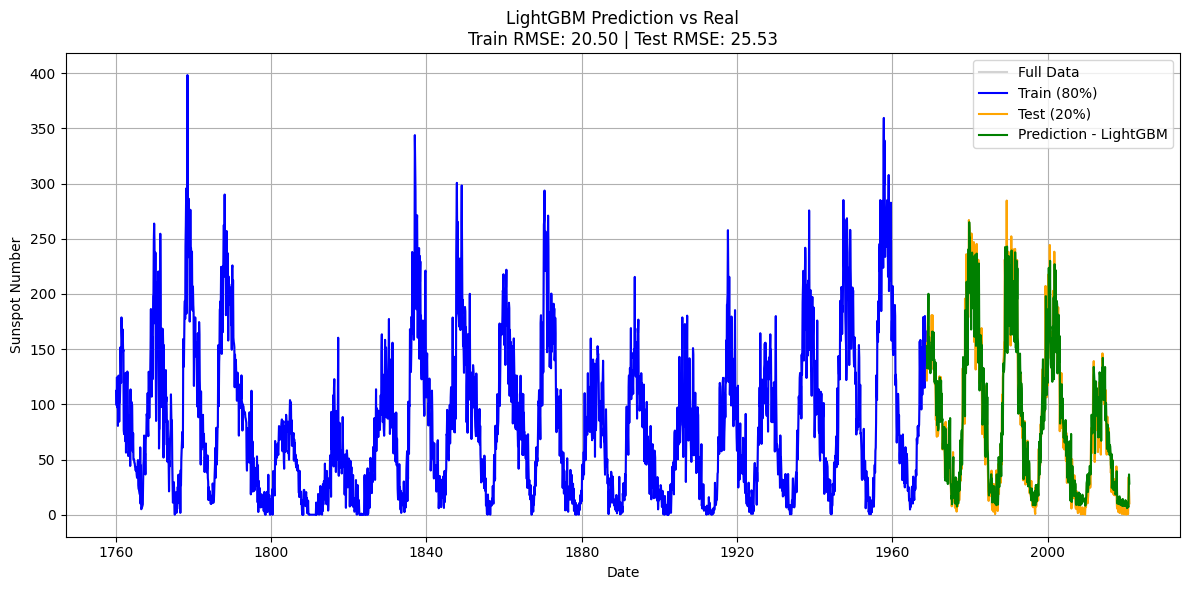

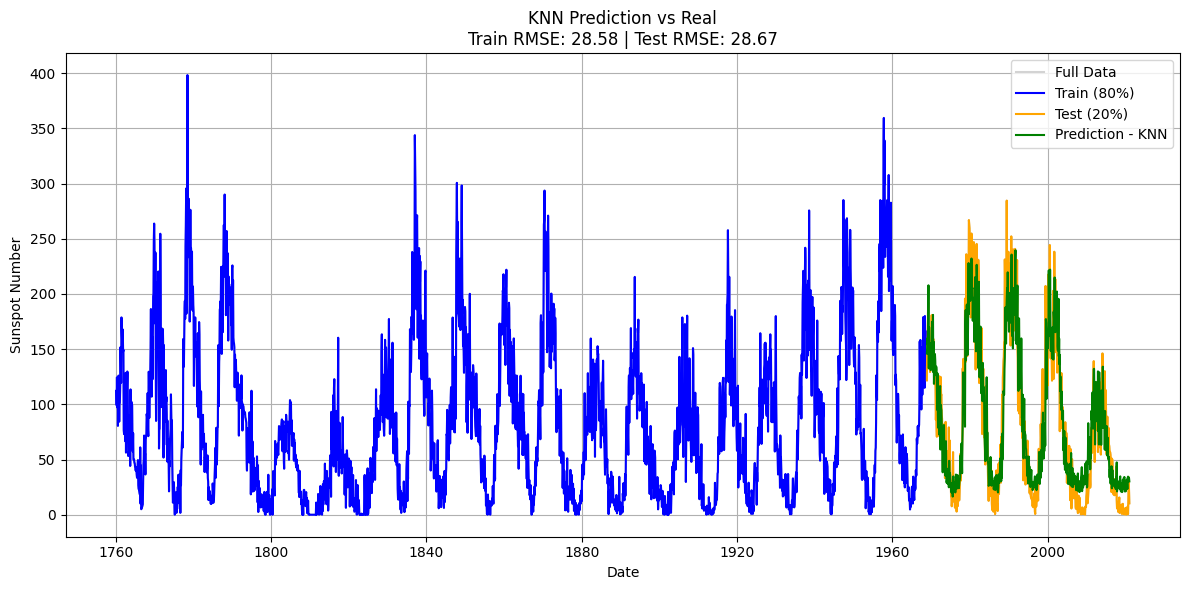


Model Performance (sorted by Overfitting Level):
                    Model  Train_RMSE  Test_RMSE  Overfit_Gap
                 LightGBM   20.503392  25.534563     5.031171
Support Vector Regression   37.818892  40.701913     2.883021
            Random Forest   25.106694  25.268781     0.162087
                      KNN   28.580526  28.670854     0.090327
    Simple Neural Network   27.050492  24.446003    -2.604489
        Linear Regression   27.071128  24.411177    -2.659951


In [ ]:
# Sunspot Forecasting with Multiple Models (Train/Test = 80%/20%)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load your dataset
df = pd.read_csv("Sunspots.csv")  # You already specified this step stays

# Prepare date and features
df['Date'] = pd.to_datetime(df['Date'])
df['Sunspot_lag1'] = df['Monthly Mean Total Sunspot Number'].shift(1)
df['Sunspot_lag12'] = df['Monthly Mean Total Sunspot Number'].shift(13)
df['Sunspot_lag132'] = df['Monthly Mean Total Sunspot Number'].shift(132)
df['Diff_1Year'] = df['Sunspot_lag1'] - df['Sunspot_lag12']
df['Diff_11Year'] = df['Sunspot_lag1'] - df['Sunspot_lag132']

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop NaN values
df = df.dropna().reset_index(drop=True)

features = [
     'Year', 'Month','Month_sin','Month_cos','Sunspot_lag132',
     'Sunspot_lag12','Sunspot_lag1','Diff_1Year'
     
]

X = df[features]
y = df['Monthly Mean Total Sunspot Number']

# Split 80% train, 20% test (no shuffle)
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, df['Date'], test_size=0.2, shuffle=False
)

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    'Simple Neural Network': MLPRegressor(
        hidden_layer_sizes=(50,), alpha=0.01, max_iter=1000,
        early_stopping=True, random_state=0
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=0
    ),
    'LightGBM': LGBMRegressor(
        random_state=0, num_leaves=15, min_child_samples=10, max_depth=5
    ),
    'KNN': KNeighborsRegressor(n_neighbors=10)
}

results = []

# Apply each model and plot separately
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    train_pred = model.predict(X_train_scaled)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Overfit_Gap': test_rmse - train_rmse
    })

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], y, color='lightgray', label='Full Data')
    plt.plot(date_train, y_train, label='Train (80%)', color='blue')
    plt.plot(date_test, y_test, label='Test (20%)', color='orange')
    plt.plot(date_test, y_pred, label=f'Prediction - {name}', color='green')

    plt.title(f"{name} Prediction vs Real\nTrain RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
    plt.xlabel("Date")
    plt.ylabel("Sunspot Number")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Show results as table

results_df = pd.DataFrame(results).sort_values(by='Overfit_Gap', ascending=False)
print("\nModel Performance (sorted by Overfitting Level):")
print(results_df.to_string(index=False))

